<a href="https://colab.research.google.com/github/SachinScaler/MachineLearning_Jan23/blob/main/Decision_Tree_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Download and Load Data:

In [ ]:
# !gdown 19L3rYatfhbBL1r5MHrv-p_oM2wlvrhqk
# !gdown 1OHLKJwA3qZopKPvlKoRldM6BvA1A4dYF
# !gdown 1N7O_fWCTJLu8SIa_paKcDEzllgpMk8sK
# !gdown 12Bh2AN8LcZAlg20ehpQrEWccUDaSdsOG

In [ ]:
import pickle
# Load data (deserialize)
with open('preprocessed_X_sm.pickle', 'rb') as handle:
    X_train = pickle.load(handle)

with open('X_test.pickle', 'rb') as handle:
    X_test = pickle.load(handle)

with open('y_sm.pickle', 'rb') as handle:
    y_train = pickle.load(handle)

with open('y_test.pickle', 'rb') as handle:
    y_test = pickle.load(handle)

In [ ]:
# import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# create instance of DT Class:
model = DecisionTreeClassifier(criterion='entropy')


# fit model
model.fit(X_train, y_train)

# Calculate Train and Test Acc Scores
print("Train Acc:", model.score(X_train, y_train))
print("Test Acc:", model.score(X_test, y_test))

Train Acc: 1.0
Test Acc: 0.7744565217391305


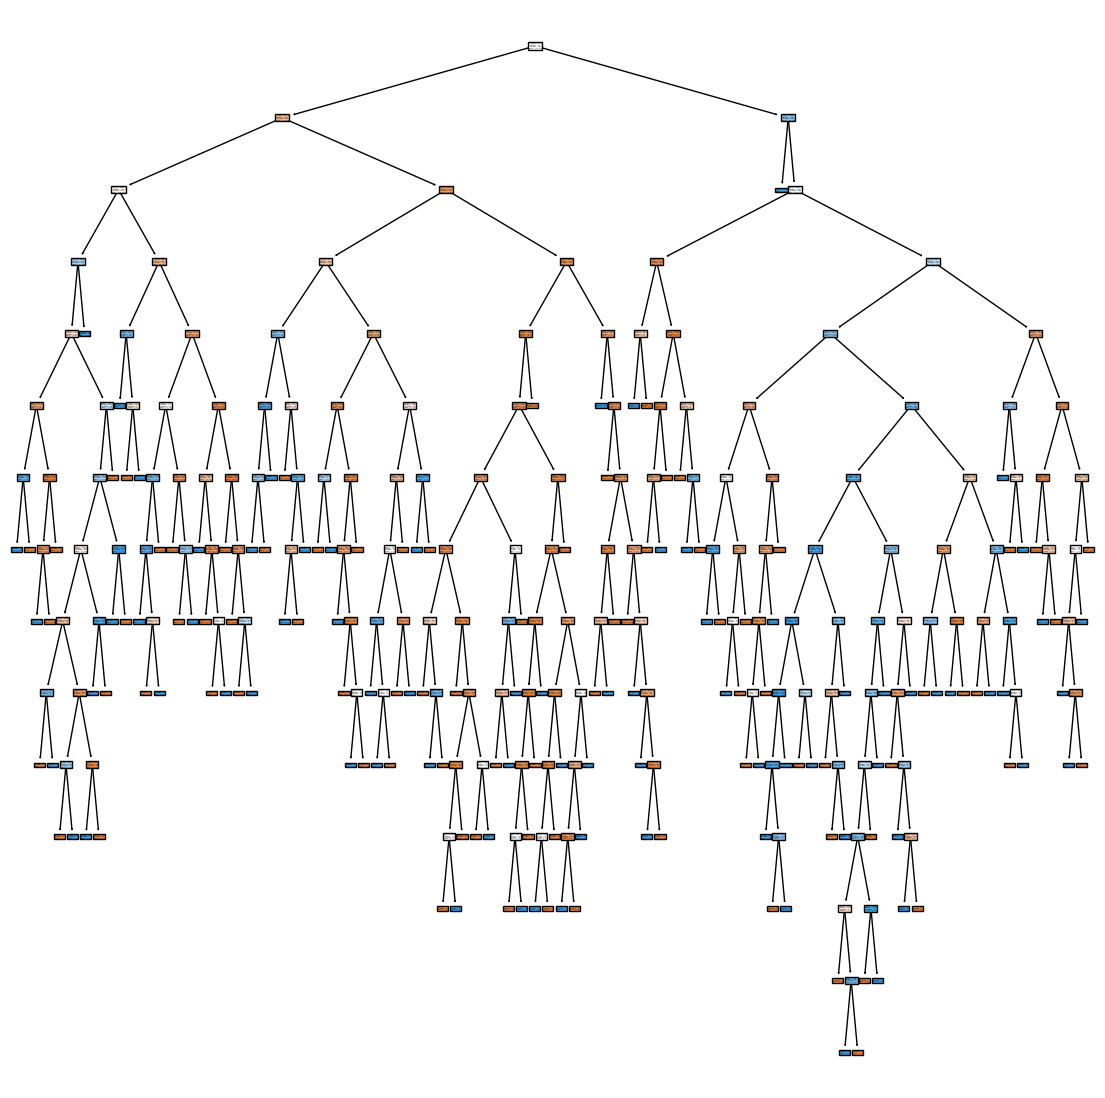

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(14,14))
plot_tree(model, filled = True);

### Control max_depth

In [ ]:
# import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

max_depths = [1,4,5,6,10,50]


for depth in max_depths:
    print("*"*50)
    print("Max Depth:",depth )
    # create instance of DT Class:
    model = DecisionTreeClassifier(criterion='entropy',max_depth=depth)
    # fit model
    model.fit(X_train, y_train)

    # Calculate Train and Test Acc Scores
    print("Train Acc:", model.score(X_train, y_train))
    print("Test Acc:", model.score(X_test, y_test))

**************************************************
Max Depth: 1
Train Acc: 0.7121212121212122
Test Acc: 0.6657608695652174
**************************************************
Max Depth: 4
Train Acc: 0.8371212121212122
Test Acc: 0.7934782608695652
**************************************************
Max Depth: 5
Train Acc: 0.8712121212121212
Test Acc: 0.7880434782608695
**************************************************
Max Depth: 6
Train Acc: 0.9020562770562771
Test Acc: 0.8152173913043478
**************************************************
Max Depth: 10
Train Acc: 0.9848484848484849
Test Acc: 0.7907608695652174
**************************************************
Max Depth: 50
Train Acc: 1.0
Test Acc: 0.782608695652174
